# Investigate The Movie Database (TMDb)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='introduction'></a>
## Introduction

<b><p>This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue,cast,release year.<br>
I am ging to do some cleaning and analysis for this data and then i will ask some quistions, answer them, visualize the reselts and write my conclusions</p></b>

<h3>Here we have :</h3><br>
<li><b>id : </b>Unique id's for each row
<li><b>imdb_id : </b>System generated unique id
<li><b>popularity : </b>popularity score 
<li><b>budget : </b>budget in dollars
<li><b>revenue : </b>revenue in dollars
<li><b>original_title : </b>Movie title
<li><b>cast : </b>cast performed in movie
<li><b>homepage : </b>website link of movie
<li><b>director : </b>director name
<li><b>tagline : </b>tagline of movie
<li><b>keywords : </b>words used to give significant idea
<li><b>overview : </b>general review of movie
<li><b>runtime : </b>movie duration in seconds
<li><b>genres : </b>categories of the movie
<li><b>production_companies : </b>producing company name
<li><b>release_date : </b>movie releasing date
<li><b>vote_count : </b>votes for the movie
<li><b>vote_average : </b>average votes given by viewers
<li><b>release_year : </b>movie releasing year
<li><b>budget_adj : </b>budget in 2010 dollars,accounting for inflation
<li><b>revenue_adj : </b>revenue in 2010 dollars,accounting for inflation</li>

<h3>Main questions to answer:</h3>

<ul>
    
<li><a href="#q1">1.Which movies have the highest revenue</a></li>

<li><a href="#q2">2.Which genres are most popular from year to year?</a></li>

<li><a href="#q3">3.In which year most of the movies released?</a></li>

<li><a href="#q4">4.What kind of  movie genres are made the most?</a></li>

<li><a href="#q5">5.What kind of genres most repeated for each year?</a></li>

<li><a href="#q6">6.In which year has the highest number of movies?</a></li>

<li><a href="#q7">7.What kind of movies have made in 2014 ?</a></li>

<li><a href="#q8">8.Which movies have the highest revenue?</a></li>

<li><a href="#q9">9.Which movies have the highest popularity?</a></li>

<li><a href="#q10">10.Which directors have made movies the most?</a></li>

<li><a href="#q11">11.Which production company has made movies the most?</a></li>
</ul>

In [13]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [2]:
#read the data
df = pd.read_csv('data/tmdb-movies.csv')
#make a copy of the original data
original_data = df.copy()
#read the first rows
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
# shape of our data
df.shape

(10866, 21)

In [4]:
# data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [5]:
# statistical insights
df[df.select_dtypes(exclude='object').columns].describe().\
drop('id',axis=1).style.background_gradient(axis=1,cmap=sns.light_palette('green', as_cmap=True))

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,10866.000000,10866.000000,10866.000000,10866.000000,10866.000000,10866.000000,10866.000000
mean,0.646441,14625701.094147,39823319.793392,102.070863,217.389748,5.974922,2001.322658,17551039.822887,51364363.253251
std,1.000185,30913213.831436,117003486.582089,31.381405,575.619058,0.935142,12.812941,34306155.722843,144632485.039973
min,0.000065,0.000000,0.000000,0.000000,10.000000,1.500000,1960.000000,0.000000,0.000000
25%,0.207583,0.000000,0.000000,90.000000,17.000000,5.400000,1995.000000,0.000000,0.000000
50%,0.383856,0.000000,0.000000,99.000000,38.000000,6.000000,2006.000000,0.000000,0.000000
75%,0.713817,15000000.000000,24000000.000000,111.000000,145.750000,6.600000,2011.000000,20853251.084404,33697095.717312
max,32.985763,425000000.000000,2781505847.000000,900.000000,9767.000000,9.200000,2015.000000,425000000.000000,2827123750.411890


In [6]:
num_cols = ['popularity','budget','revenue','runtime','vote_count','vote_average','release_year','budget_adj','revenue_adj']

In [14]:
df.skew()

id              1.732294
popularity      9.876331
budget          3.717237
revenue         6.658397
runtime         6.103793
vote_count      6.177306
vote_average   -0.435908
release_year   -1.204254
budget_adj      3.114920
revenue_adj     6.251202
dtype: float64

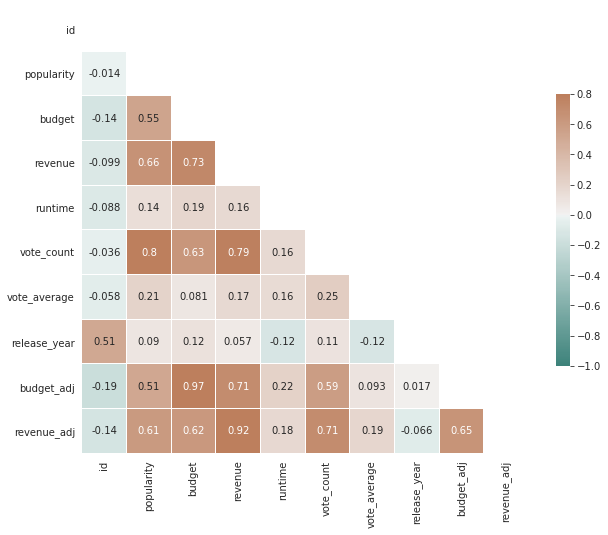

In [12]:
#correlation heatmap
corr = df.corr()

#apply a mask
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)]=True

#sett a palette
cmap = sns.diverging_palette(180, 30, as_cmap=True)

with sns.axes_style('white'):
    fig, ax = plt.subplots(figsize=(10, 10))
    sns.heatmap(corr,  mask=mask, cmap=cmap, annot=True, center=0, vmin=-1, vmax=0.8,
                square=True, cbar_kws={'shrink':.5, 'orientation': 'vertical'}, linewidth=.02);

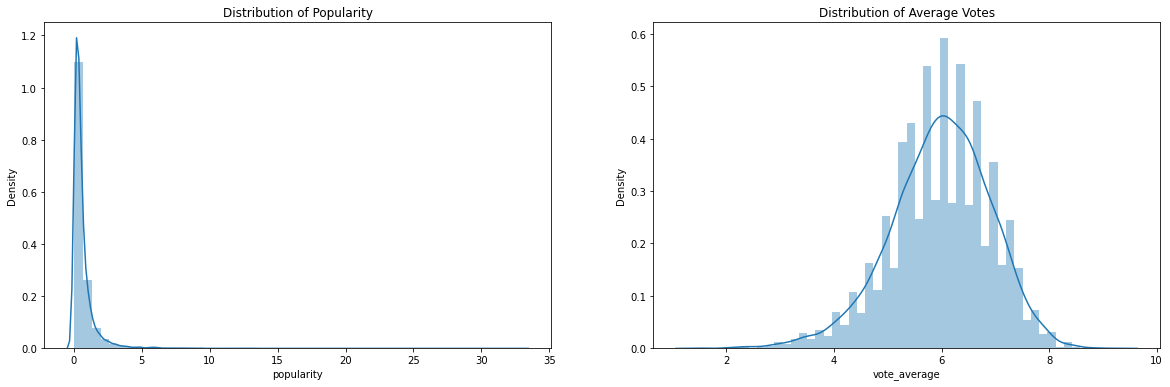

In [15]:
#visualizing the distribution of popularity and average_vote columns
fig ,axs = plt.subplots(1,2,figsize=(20,6))

sns.distplot(df['popularity'],ax=axs[0]);
axs[0].set_title('Distribution of Popularity');
sns.distplot(df['vote_average'],ax=axs[1]);
axs[1].set_title('Distribution of Average Votes');

> <h3> Conclusion</h3><br>
<li><b>Popularity has a high skewness number
<li>Vote average is almost normaly distributes
<li>Movie and revenue increases over the years

# Data Cleaning

#### checkthe null values in our data

In [16]:
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [17]:
#show the percentage of null values in each column
pd.DataFrame(round(100*(df.isnull().sum()/len(df.index)),4)).rename(columns={0:'null values precentage'})\
                                                            .sort_values('null values precentage',ascending = False)

,null values precentage
homepage,72.9799
tagline,25.9893
keywords,13.7401
production_companies,9.4791
cast,0.6994
director,0.4049
genres,0.2117
imdb_id,0.0920
overview,0.0368
budget_adj,0.0000


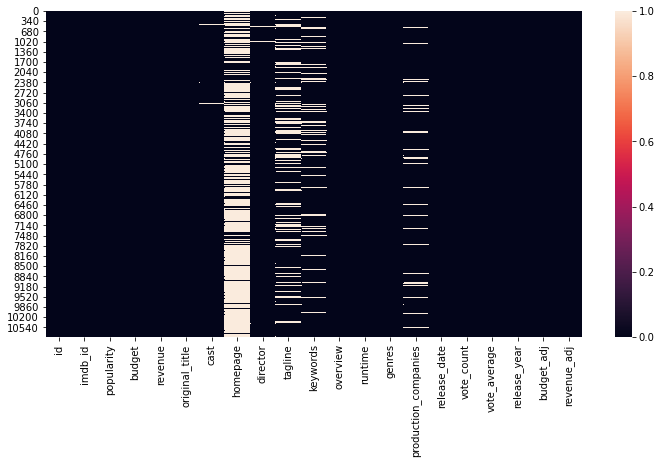

In [18]:
#visualizing the null values
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull());

> <h3> Conclusion</h3><br>
<b>We can see clearly the effect of null values in our data and most of them in homepage column

### Dealing with the missing values

In [19]:
#lets drop imdb_id, homepage and release_date columns from our data
df.drop(['imdb_id','homepage'],axis =1,inplace =True)

#all columns that have null values contains string, so its better to drop it
df.dropna(how = 'any',inplace = True)

In [20]:
#lets look to the shape of our data 
df.shape

(7032, 19)

In [21]:
#converting release_date column to a timestamp
df['release_date'] = pd.to_datetime(df['release_date'])

#create a new month column 
df['release_month'] = df['release_date'].dt.month

#create a new day name 
df['release_day'] = df['release_date'].dt.day_name

### Exploratory Data Analysis

In [22]:
def bar_plot(x, y, x_label='', y_label='', title=''):
    #visualizing the results
    plt.figure(figsize = (20,10)) #set a figure size
    ax=sns.barplot(x =x , y = y)
    # rotate xtick labels by 40 degrees
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right",fontsize = 12)
    plt.tight_layout()
    #gives names to x-axis , y-axis & the title
    plt.xlabel(x_label , fontsize = 20)
    plt.ylabel(y_label , fontsize = 20)
    plt.title(title,fontsize = 30)
    plt.show()

In [23]:
def pie_plot(x, labels, title='',explode=None):
    fig, ax = plt.subplots(figsize=(20,10))
    ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    ax.set_title(title,fontsize=25)
    ax.pie(labels=labels,
            x=x,
            shadow=True, startangle=18,
            autopct='%1.1f%%',
            explode=explode);
    plt.show()

In [24]:
def line_plot(x, y, x_label='', y_label='', title=''):
    #visualizing our results
    plt.figure(figsize = (20,8)) #set a figure size
    ax=sns.lineplot(x = x , y = y)
    plt.tight_layout()
    #gives names to x-axis , y-axis & the title
    plt.xlabel(x_label , fontsize = 20)
    plt.ylabel(y_label , fontsize = 20)
    plt.title(title,fontsize = 30)
    plt.show()

<a id='q1'></a>
> ### 1.Which movies have the highest revenue? 

In [25]:
#lets show the ten highest revenue movies
temp = df.sort_values('revenue',ascending=False)[['original_title','revenue']].head(10)
temp

,original_title,revenue
1386,Avatar,2781505847
3,Star Wars: The Force Awakens,2068178225
5231,Titanic,1845034188
4361,The Avengers,1519557910
0,Jurassic World,1513528810
4,Furious 7,1506249360
14,Avengers: Age of Ultron,1405035767
3374,Harry Potter and the Deathly Hallows: Part 2,1327817822
5422,Frozen,1274219009
5425,Iron Man 3,1215439994


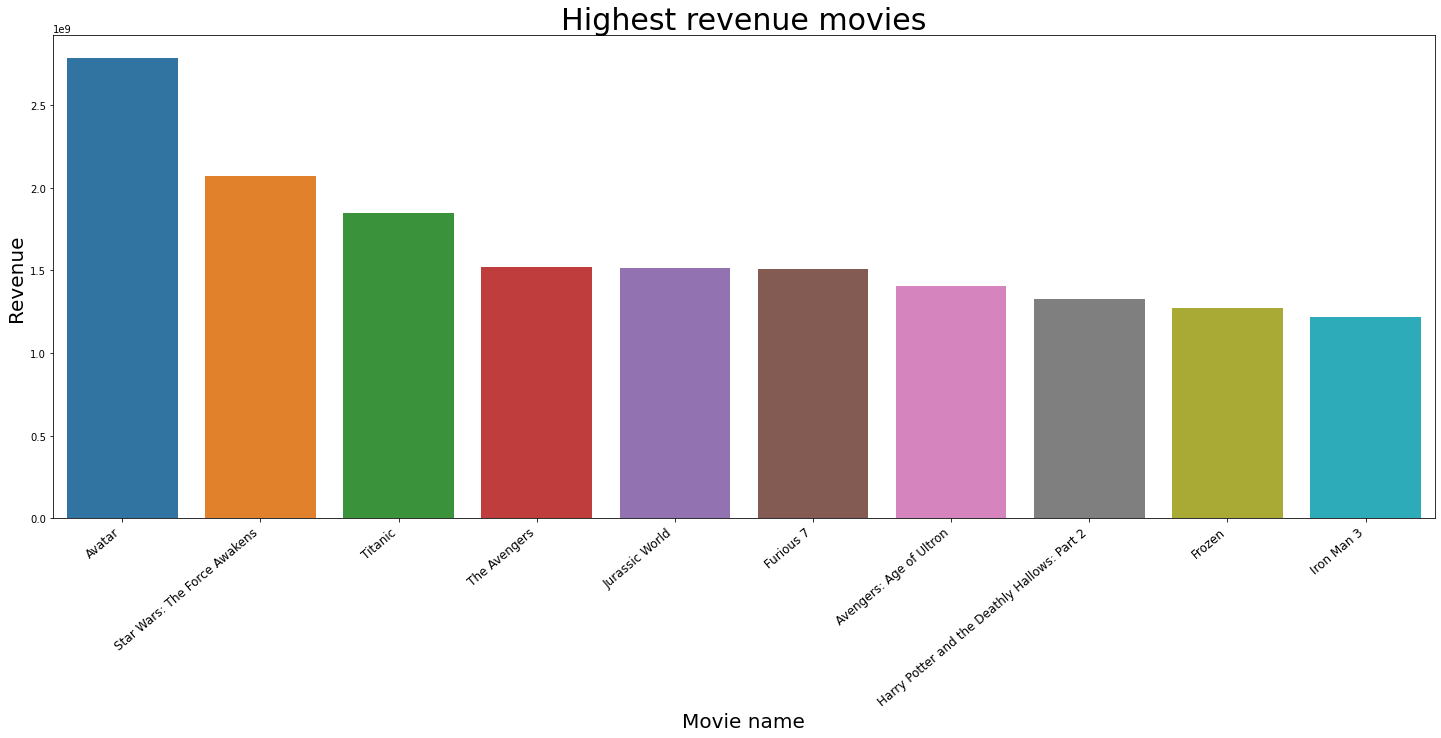

In [26]:
bar_plot(x=temp['original_title'], y=temp['revenue'], 
         x_label='Movie name', y_label='Revenue', title='Highest revenue movies')

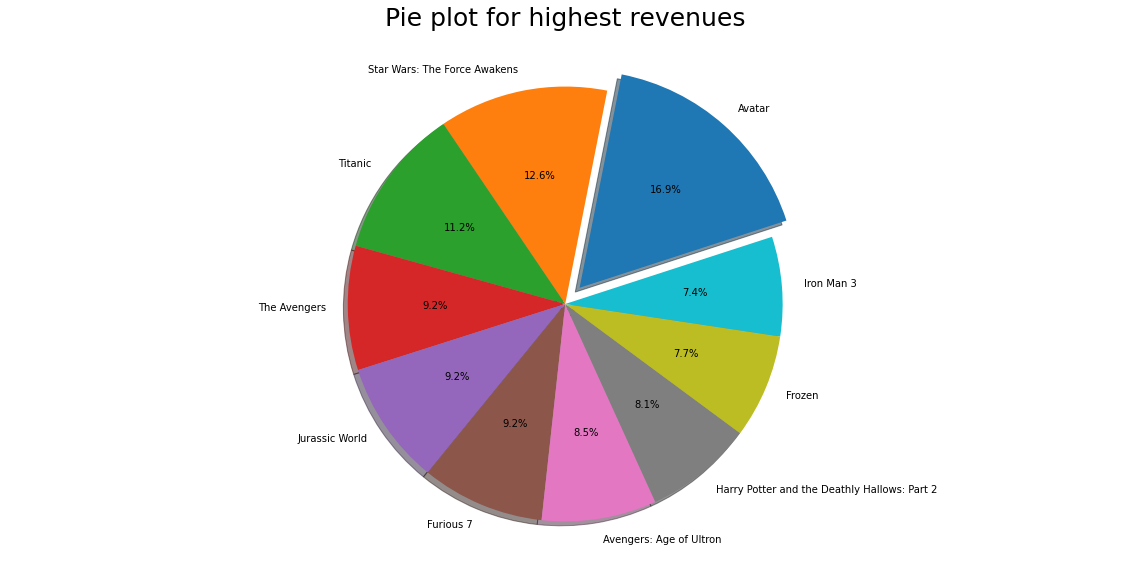

In [27]:
explode = (0.1,0,0,0,0,0,0,0,0,0)
pie_plot(labels=temp['original_title'],x=temp['revenue'],
        title='Pie plot for highest revenues',explode=explode)

<a id='q2'></a>
> ### 2.Which movies are the most popular? 

In [28]:
#lets show the top ten popular movies
temp = df.sort_values('popularity',ascending=False)[['original_title','popularity']].head(10)
temp

,original_title,popularity
0,Jurassic World,32.985763
1,Mad Max: Fury Road,28.419936
629,Interstellar,24.949134
630,Guardians of the Galaxy,14.311205
2,Insurgent,13.112507
631,Captain America: The Winter Soldier,12.971027
1329,Star Wars,12.037933
632,John Wick,11.422751
3,Star Wars: The Force Awakens,11.173104
633,The Hunger Games: Mockingjay - Part 1,10.739009


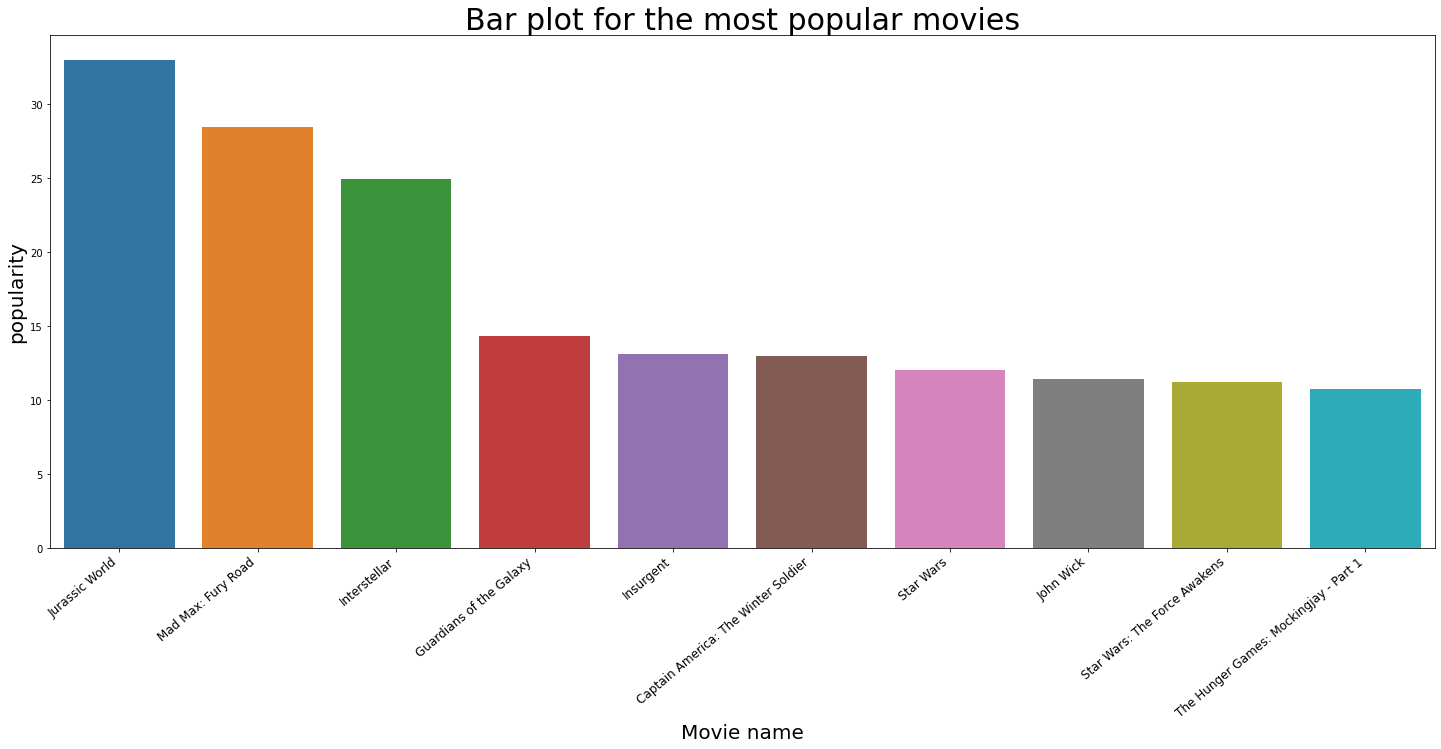

In [29]:
bar_plot(x=temp['original_title'], y=temp['popularity'], 
         x_label='Movie name', y_label='popularity', title='Bar plot for the most popular movies')

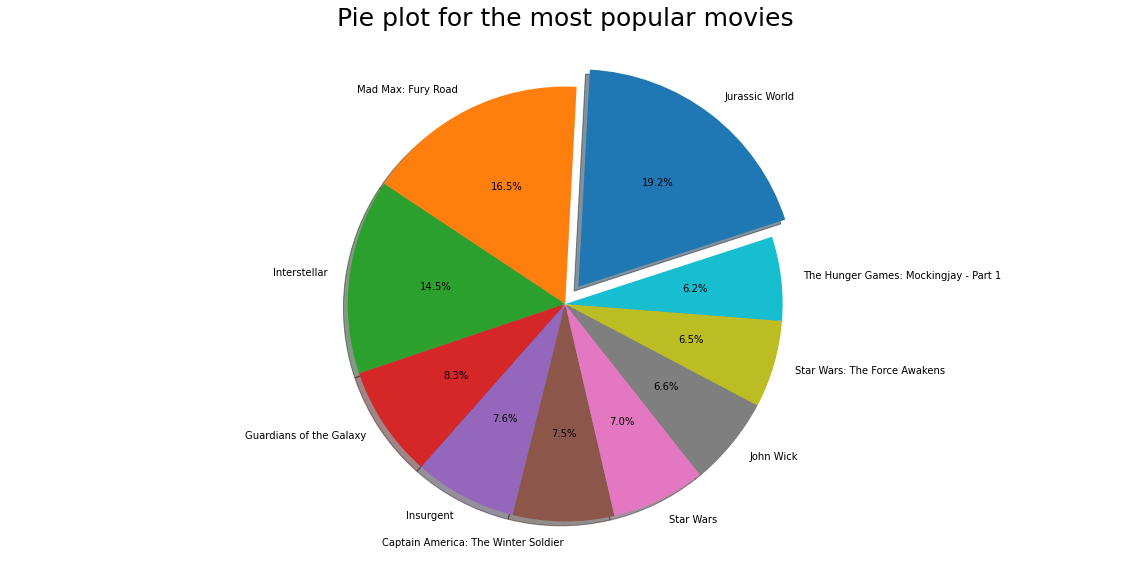

In [30]:
explode = (0.1,0,0,0,0,0,0,0,0,0)
pie_plot(labels=temp['original_title'],x=temp['popularity'],
        title='Pie plot for the most popular movies',explode=explode)

<a id='q3'></a>
> ### 3.Which movies have the highest avrerage votes? 

In [31]:
#lets show the top ten voted movies
temp = df.sort_values('vote_average',ascending=False)[['original_title','vote_average']].head(10)
temp

,original_title,vote_average
7948,Stop Making Sense,8.4
4178,The Shawshank Redemption,8.4
609,The Jinx: The Life and Deaths of Robert Durst,8.4
7269,The Godfather,8.3
9315,For All Mankind,8.2
650,Whiplash,8.2
4179,Forrest Gump,8.1
5827,Jodorowsky's Dune,8.1
2389,Bill Cunningham New York,8.1
2409,Fight Club,8.1


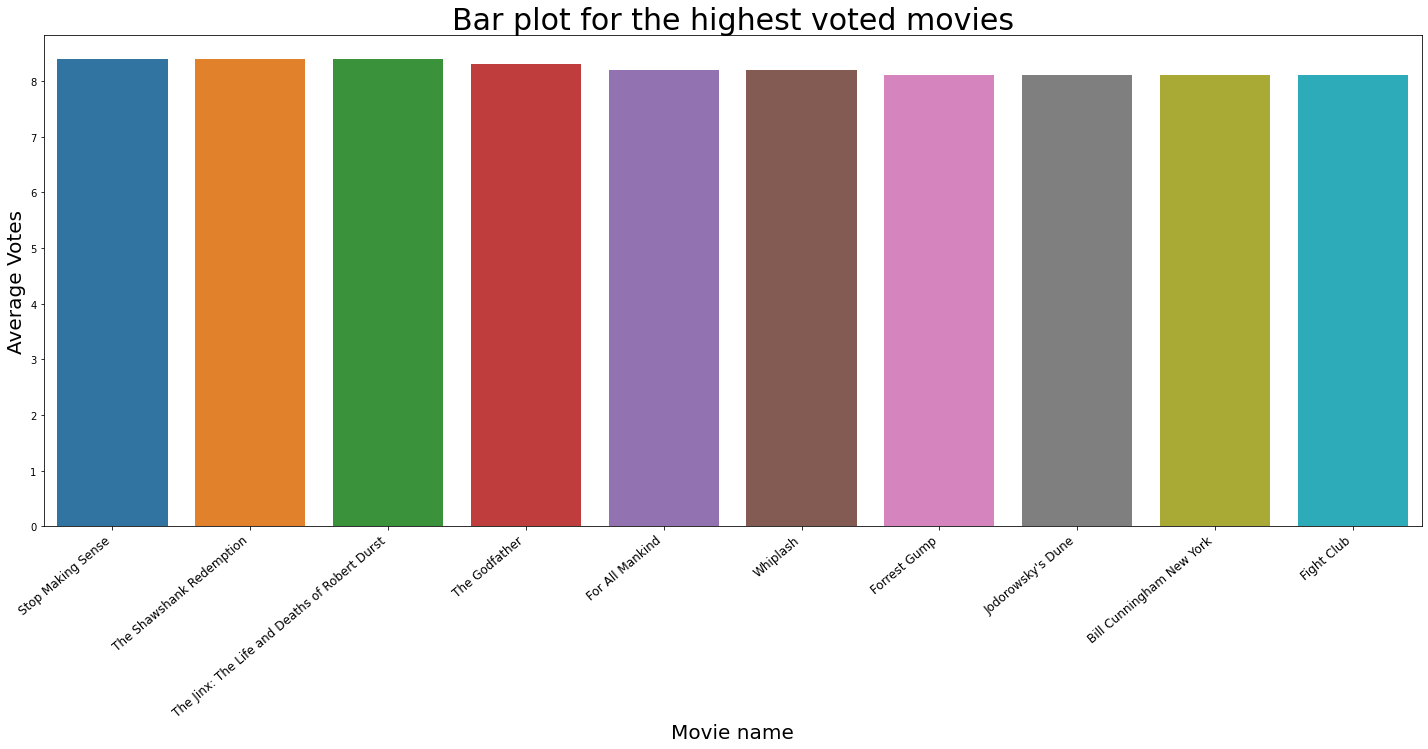

In [32]:
bar_plot(x=temp['original_title'], y=temp['vote_average'], 
         x_label='Movie name', y_label='Average Votes', 
         title='Bar plot for the highest voted movies')

<a id='q4'></a>
> ### 4.What kind of  movie genres are made the most? 

In [33]:
df.dropna(inplace=True)
genre_labels = set()

for s in df['genres'].str.split('|').values:
    genre_labels = genre_labels.union(set(s))
    
print('We have {} types of movie :'.format(len(genre_labels)))
genre_labels

We have 20 types of movie :


{'Action',
 'Adventure',
 'Animation',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'Foreign',
 'History',
 'Horror',
 'Music',
 'Mystery',
 'Romance',
 'Science Fiction',
 'TV Movie',
 'Thriller',
 'War',
 'Western'}

In [34]:
#first we need to know all type of genre, then count the number of each genre in our rows

init = {}
for i in range(len(df)):
    row_genres = df['genres'].iloc[i].split('|')
    for g in row_genres:
        if g in init:
            init[g]+=1
        if g not in init:
            init[g]=1
            
#Create a new data frame

genre_df = pd.DataFrame(init.values()).T
genre_df.columns = init.keys()
genre_df = genre_df.T.rename(columns={0:'Genre Count'}).sort_values(by='Genre Count',ascending=False)
genre_df
# pd.DataFrame(list(init.items()))

,Genre Count
Drama,3118
Comedy,2522
Thriller,2141
Action,1754
Horror,1146
Romance,1130
Adventure,1091
Crime,1063
Science Fiction,911
Family,748


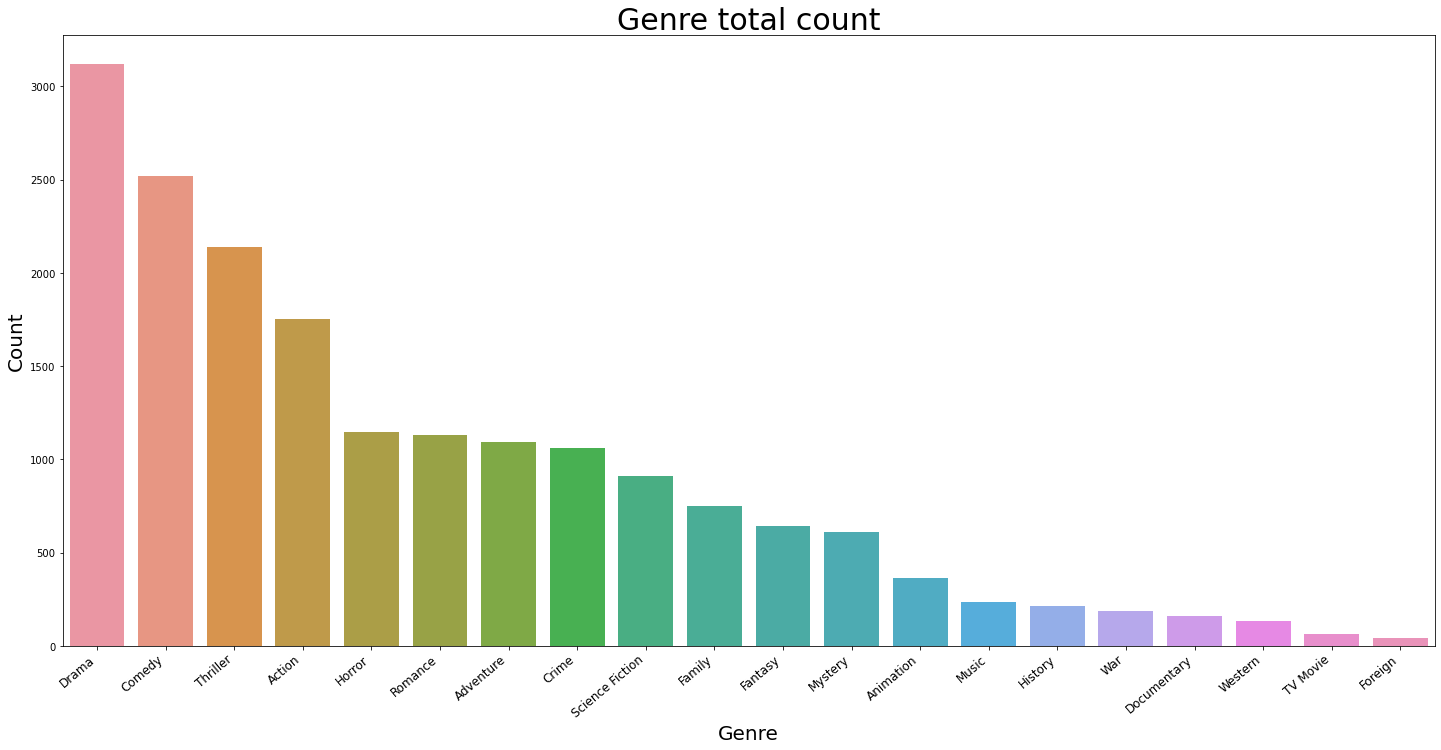

In [35]:
data = genre_df.reset_index()

bar_plot(x=data['index'], y=data['Genre Count'], 
         x_label='Genre', y_label='Count', 
         title='Genre total count')

> <h3> Conclusion</h3><br>
<b>We can see clearly that darama genre has made the most

<a id='q5'></a>
> ### 5.What kind of genres most repeated for each year?

In [36]:
#lets create a new dataframe to count the value for each genre
genre = df.copy()

for g in genre_df.index:
    genre[g] = np.zeros(len(genre))
    
for i in range(len(df)):
    row_genres = genre['genres'].iloc[i].split('|')
    for g in row_genres:
        genre[g].iloc[i]+=1

In [37]:
genre_for_year = genre.groupby('release_year').sum()[list(init.keys())]
genre_for_year

,Action,Adventure,Science Fiction,Thriller,Fantasy,Crime,Western,Drama,Family,Animation,Comedy,Mystery,Romance,War,History,Music,Horror,Documentary,TV Movie,Foreign
release_year,,,,,,,,,,,,,,,,,,,,
1960,5.0,5.0,3.0,6.0,2.0,2.0,5.0,10.0,3.0,0.0,7.0,0.0,4.0,0.0,3.0,1.0,7.0,0.0,0.0,0.0
1961,6.0,6.0,2.0,0.0,1.0,2.0,2.0,16.0,2.0,1.0,7.0,1.0,6.0,2.0,3.0,2.0,3.0,0.0,0.0,1.0
1962,6.0,7.0,2.0,7.0,1.0,2.0,3.0,17.0,2.0,0.0,5.0,4.0,5.0,2.0,3.0,1.0,5.0,0.0,0.0,1.0
1963,4.0,7.0,2.0,10.0,2.0,4.0,2.0,10.0,3.0,1.0,11.0,5.0,7.0,1.0,4.0,0.0,8.0,0.0,0.0,1.0
1964,5.0,4.0,4.0,9.0,3.0,10.0,1.0,20.0,4.0,2.0,14.0,4.0,7.0,3.0,3.0,5.0,6.0,0.0,0.0,1.0
1965,6.0,4.0,1.0,9.0,0.0,2.0,2.0,15.0,3.0,1.0,6.0,3.0,4.0,5.0,2.0,2.0,4.0,0.0,1.0,0.0
1966,14.0,11.0,5.0,5.0,2.0,5.0,7.0,13.0,6.0,2.0,13.0,4.0,5.0,4.0,2.0,0.0,3.0,0.0,0.0,1.0
1967,5.0,6.0,3.0,4.0,3.0,5.0,2.0,13.0,3.0,1.0,14.0,2.0,9.0,1.0,0.0,2.0,4.0,0.0,0.0,0.0
1968,6.0,5.0,4.0,4.0,5.0,4.0,1.0,17.0,5.0,1.0,8.0,3.0,6.0,4.0,3.0,3.0,4.0,0.0,0.0,0.0


In [39]:
# import plotly 
# import cufflinks as cf
# import plotly.express as px

# genre_for_year.reset_index().iplot(kind='line', x='release_year', y='Action')
# px.line(x='release_year',
#         data_frame=genre_for_year.reset_index(),
#         y=genre_for_year.columns[1:])

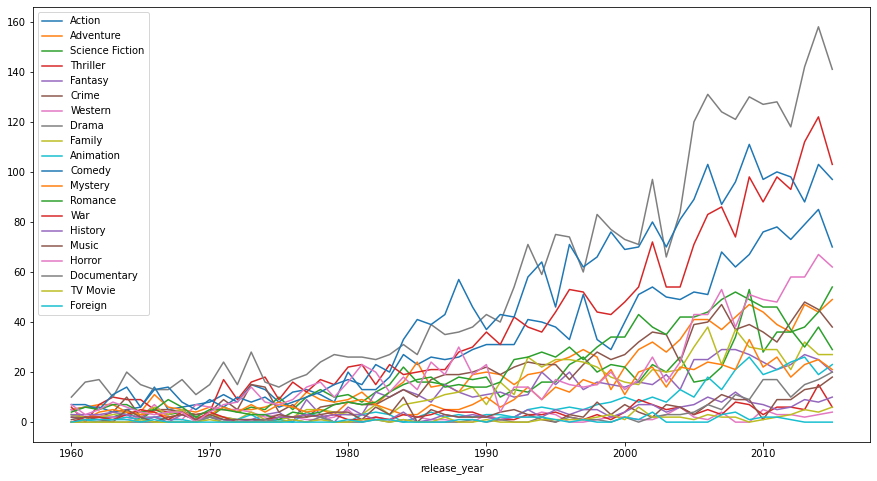

In [48]:
fig, ax = plt.subplots(figsize=(15, 8))
genre_for_year.plot(kind='line', ax=ax);

<a id='q6'></a>
> ### 6.In which year has the highest number of movies?

In [49]:
year_df = pd.DataFrame(df['release_year'].value_counts())
year_df.columns = ['Movies Count']
year_df.head()

,Movies Count
2014,384
2013,346
2015,341
2009,306
2011,306


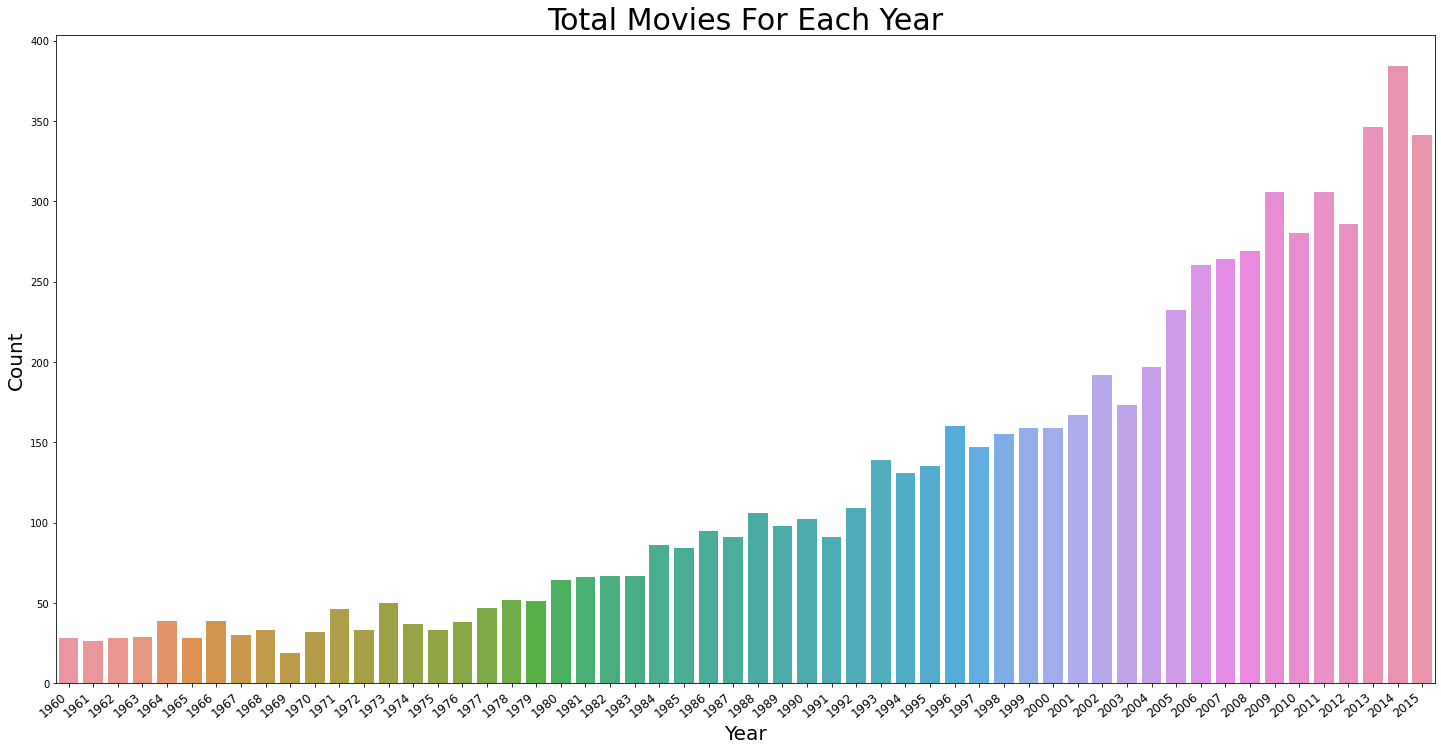

In [50]:
data = year_df.reset_index()

bar_plot(x=data['index'], y=data['Movies Count'], 
         x_label='Year', y_label='Count', 
         title='Total Movies For Each Year')

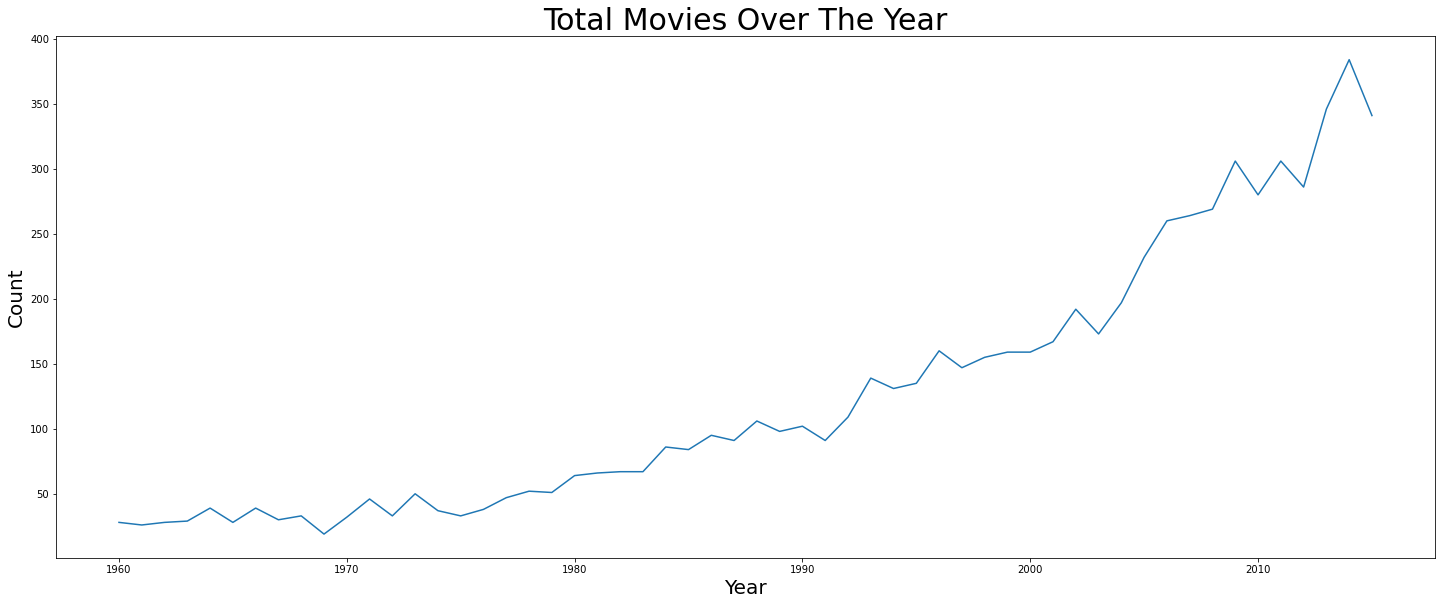

In [51]:
line_plot(x = data['index'] , y = data['Movies Count'], 
          x_label='Year', y_label='Count', 
          title='Total Movies Over The Year')

> <h3> Conclusion</h3><br>
<b><li>Year 2014 is the year that has the highest number of movies
    <li>Number of movies increases by year

<a id='q7'></a>
> ### 7.What kind of movies have made in 2014 ?

In [52]:
### lets see what's in this year (2014)
temp_2014 = genre_for_year.loc[2014].to_frame().rename(columns={2014:'genre count'})\
            .sort_values('genre count',ascending=False).reset_index()
temp_2014

,index,genre count
0,Drama,158.0
1,Thriller,122.0
2,Comedy,103.0
3,Action,85.0
4,Horror,67.0
5,Crime,45.0
6,Science Fiction,44.0
7,Adventure,44.0
8,Romance,38.0
9,Family,27.0


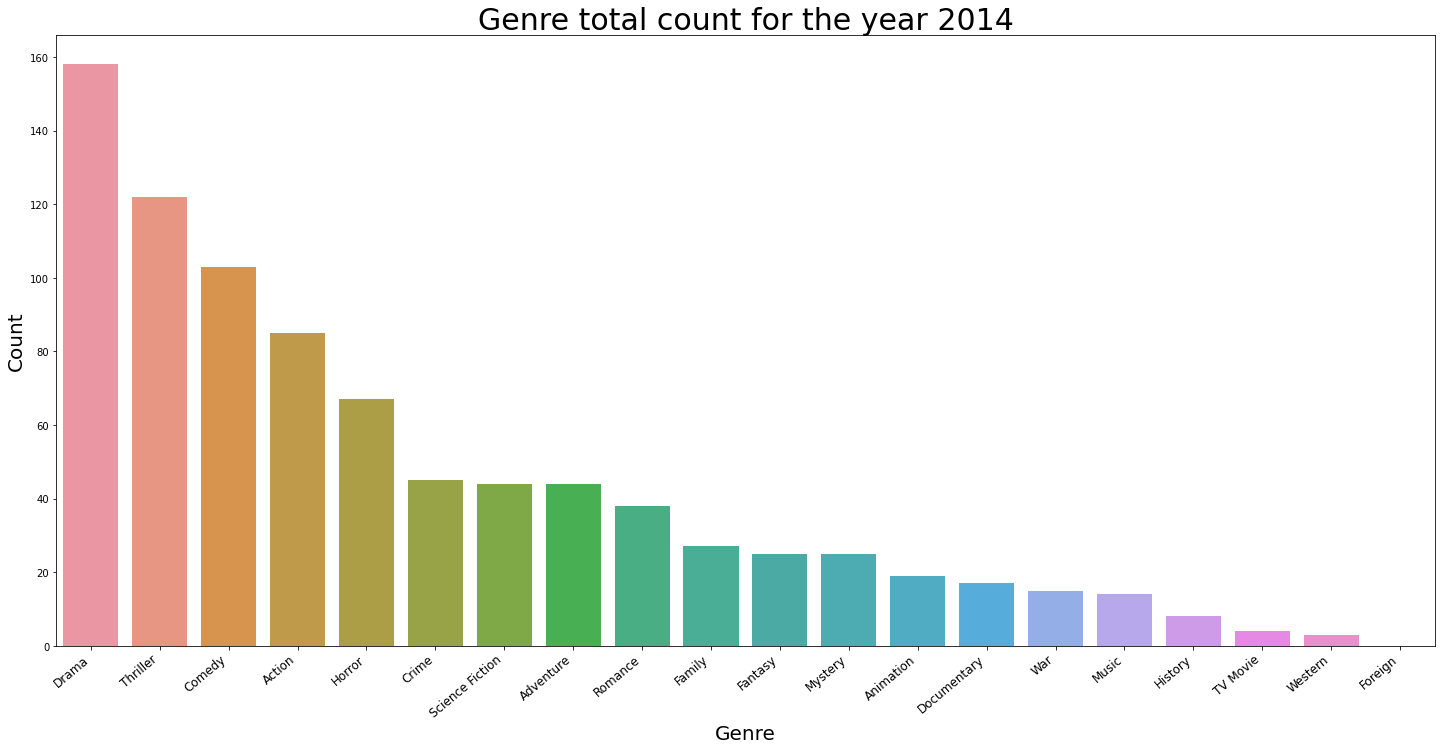

In [53]:
data = temp_2014.reset_index()

bar_plot(x=data['index'], y=data['genre count'], 
         x_label='Genre', y_label='Count', 
         title='Genre total count for the year 2014')

<a id='q8'></a>
> ### 8.Which kind of movies get the highest revenue?

In [54]:
#creat a new dataframe has the total number of revenue for each genre
temp = pd.DataFrame(columns=init.keys())
for g in genre_df.index:
    temp[g] = np.zeros(1)

for i in range(len(df)):
    for col in genre[list(temp.columns)]:
        if genre[col].iloc[i]>0:
            temp[col]+=df['revenue'].iloc[i]

In [55]:
temp = temp.T.rename(columns={0:'revenue'})
temp

,revenue
Action,1.701296e+11
Adventure,1.621408e+11
Science Fiction,8.501549e+10
Thriller,1.174464e+11
Fantasy,8.595390e+10
Crime,5.517669e+10
Western,4.620562e+09
Drama,1.318482e+11
Family,8.604027e+10
Animation,5.061144e+10


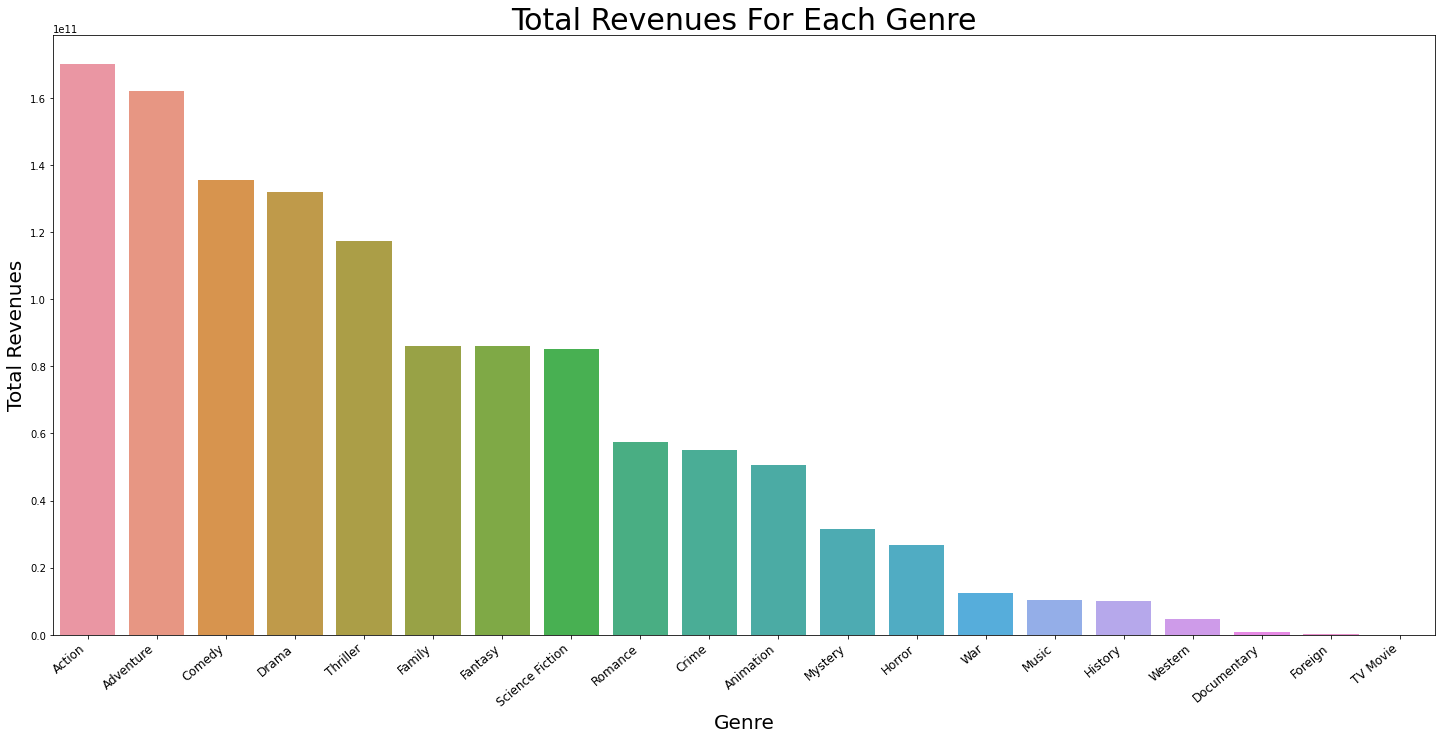

In [56]:
data = temp.reset_index().sort_values('revenue',ascending=False)

bar_plot(x=data['index'], y=data['revenue'], 
         x_label='Genre', y_label='Total Revenues', 
         title='Total Revenues For Each Genre')

> <h3> Conclusion</h3><br>
<b><li>Action movies have the highest revenues

<a id='q9'></a>
> ### 9.Which kind of movies have the highest popularity?

In [57]:
#creat a new dataframe for the popularity fr each genre
temp = pd.DataFrame(columns=init.keys())
for g in genre_df.index:
    temp[g] = np.zeros(1)

for i in range(len(df)):
    for col in genre[list(temp.columns)]:
        if genre[col].iloc[i]>0:
            temp[col]+=df['popularity'].iloc[i]

In [58]:
temp = temp.T.rename(columns={0:'popularity'}).sort_values('popularity',ascending=False)
temp

,popularity
Drama,2283.820539
Action,1984.056223
Thriller,1893.374590
Comedy,1862.520786
Adventure,1546.694423
Science Fiction,1133.460518
Crime,894.346480
Romance,827.727583
Fantasy,798.536130
Family,770.621218


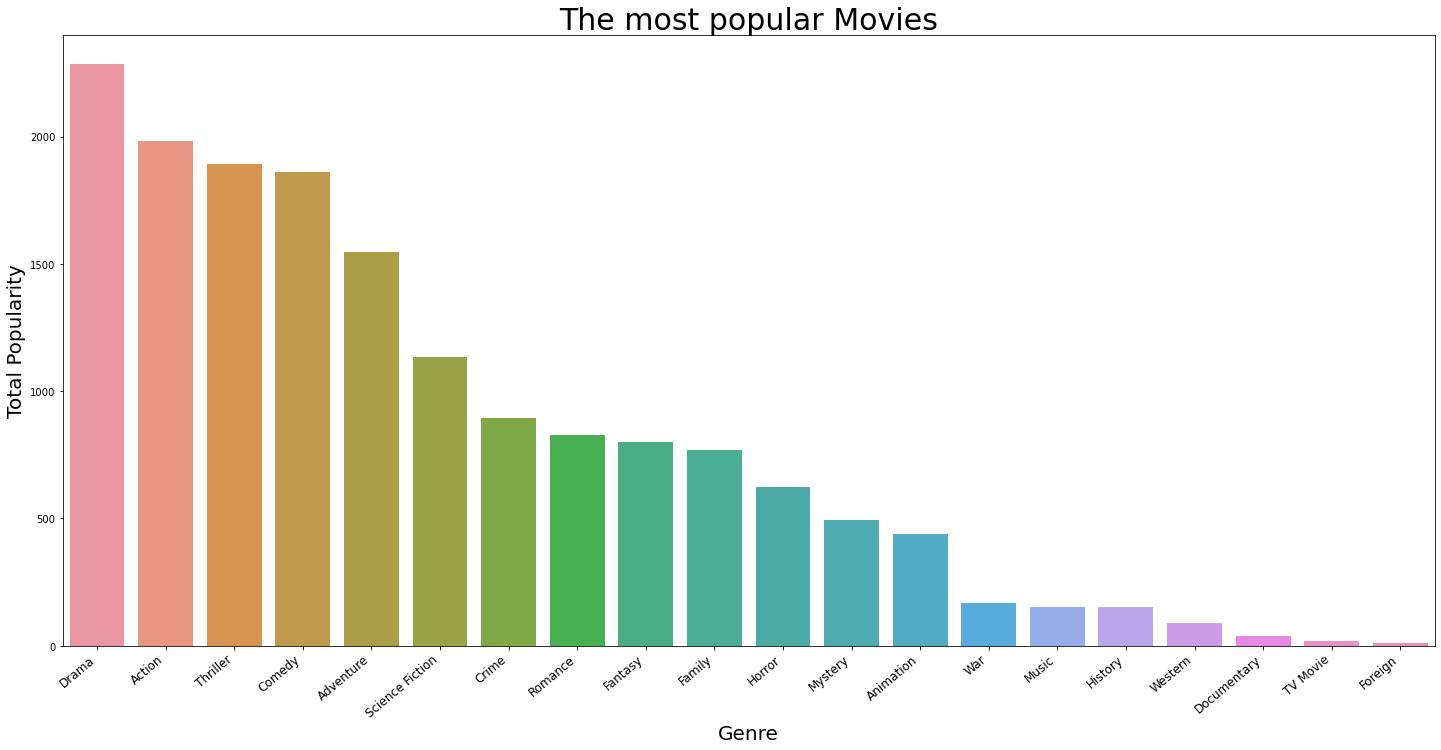

In [59]:
data = temp.reset_index()

bar_plot(x=data['index'], y=data['popularity'], 
         x_label='Genre', y_label='Total Popularity', 
         title='The most popular Movies')

> <h3> Conclusion</h3><br>
<b><li>Drama movies are the most popular movies

<a id='q10'></a>
> ### 10.Which directors have made movies the most?

In [60]:
#Top ten director
temp = df['director'].value_counts().to_frame().rename(columns={'director':'Director\'s movies'}).head(10)
temp

,Director's movies
Steven Spielberg,28
Clint Eastwood,27
Ridley Scott,22
Ron Howard,22
Martin Scorsese,22
Woody Allen,21
Steven Soderbergh,20
Barry Levinson,19
Brian De Palma,18
Tim Burton,18


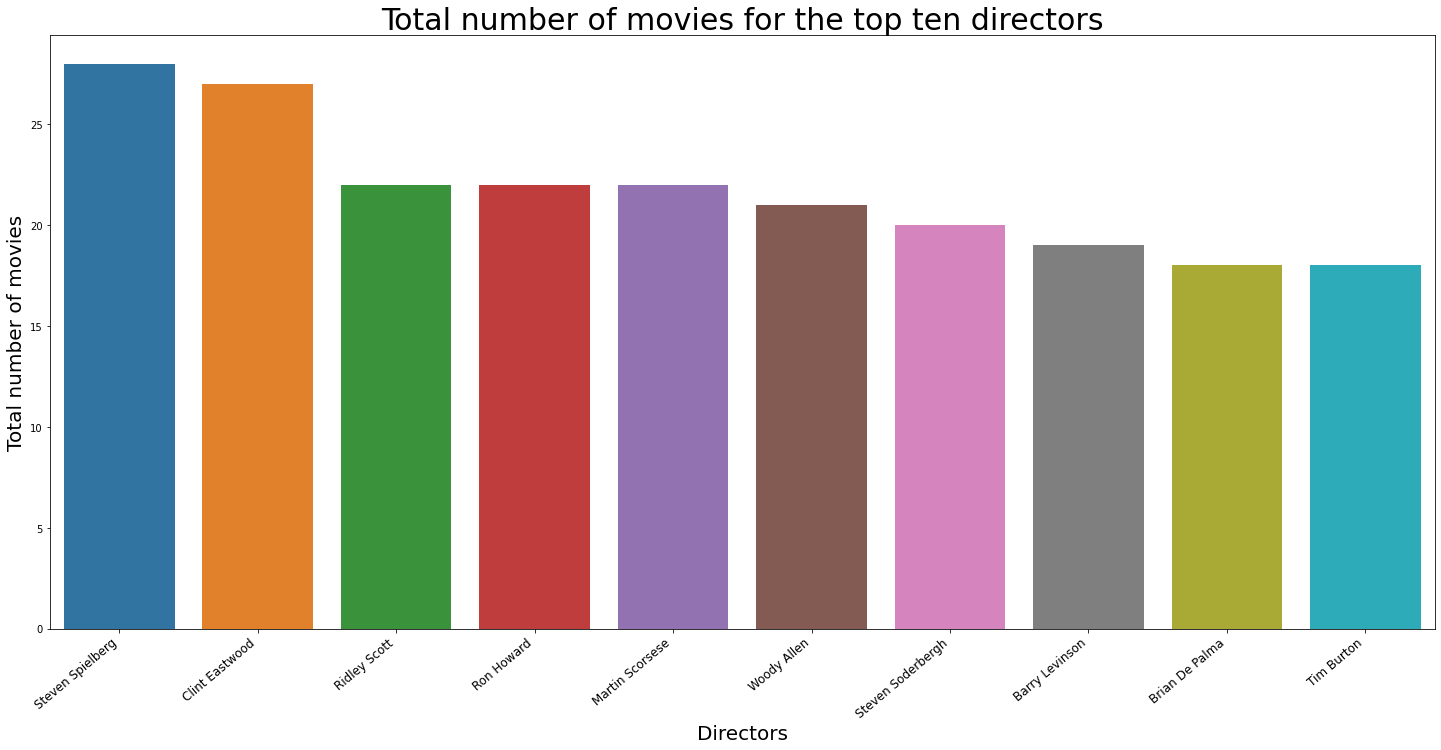

In [61]:
data = temp.reset_index()

bar_plot(x=data['index'], y=data['Director\'s movies'], 
         x_label='Directors', y_label='Total number of movies', 
         title='Total number of movies for the top ten directors')

> <h3> Conclusion</h3><br>
<b><li>Director Steven Spielberg has the highest number of movies with 28 movies

<a id='q11'></a>
> ### 11.Which production company has made movies the most?

In [62]:
temp = df['production_companies'].value_counts().to_frame().rename(columns={'production_companies':'movies count'}).head(10)
temp

,movies count
Paramount Pictures,137
Universal Pictures,106
Columbia Pictures,67
Warner Bros.,67
Metro-Goldwyn-Mayer (MGM),62
New Line Cinema,53
Walt Disney Pictures,44
Touchstone Pictures,42
Twentieth Century Fox Film Corporation,41
20th Century Fox,38


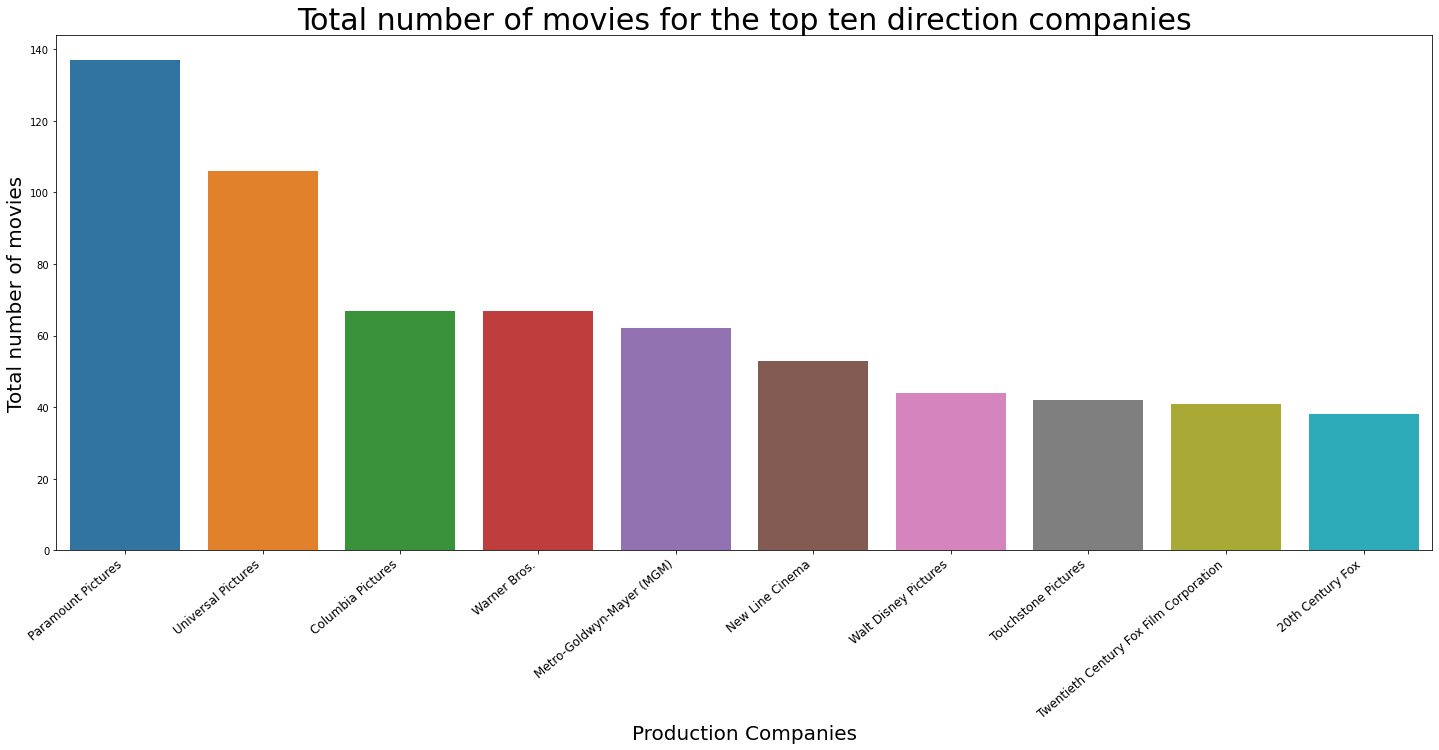

In [63]:
data = temp.reset_index()

bar_plot(x=data['index'], y=data['movies count'], 
         x_label='Production Companies', y_label='Total number of movies', 
         title='Total number of movies for the top ten direction companies')

.<h1>Conclusions:</h1>
><h2>Results:</h2>
><li>Drama genre is the most kind of movies has made.
><li>Action movies are the most popular.
><li>Avatar movie has the highest revenue.
><li>Jurassic World movie is the most popular.
><li>Highest average vote is 8.4 like The Shawshank Redemption movie.
><li>Year 2014 is the year that has the highest number of movies.
><li>Steven Spielberg director has the highest number of movies.
><li>Paramount Pictures company produced the most of movies.</li>

><h2>Limitations:</h2>
><li>We have a lot of missing data in many columns such as production_companies, homepage and tagline columns.
><li>Most of our data are not normally distributed, and also have high skeweness.

# <h1 style="text-align:center">Thanks</h1>